# Assignment 4
by Anchalee P Ramirez

In [1]:
!pip3 install seaborn

'pip3' is not recognized as an internal or external command,
operable program or batch file.


## This cell automatically downloads Capital Bikeshare data

In [2]:
def download_bikeshare_data(year, quarter, data_folder):

   """

   Downloads data for a given year and quarter from Capital Bikeshare's Amazon S3 into

   the given data folder.

   

   The data can be found at: https://s3.amazonaws.com/capitalbikeshare-data/index.html

   """

   

   zip_filename = get_bikeshare_filename(year, quarter, ".zip")

   csv_filename = get_bikeshare_filename(year, quarter, ".csv")



   zip_filepath = data_folder + zip_filename

   csv_filepath = data_folder + csv_filename



   if not os.path.exists(csv_filepath):

       

       # Download data from Amazon S3 using requests library

       print("Downloading:", year, "Q%d" % quarter, end=" | ")

       # response = requests.get("https://s3.amazonaws.com/capitalbikeshare-data/%s" % zip_filename)

       response = requests.get("http://mla.im/%s" % zip_filename)



       # Write downloaded zip file to disk within the data folder

       with open(zip_filepath, "wb") as f:

           f.write(response.content)

       

       # Extract zip using the zipfile library and normalize the csv filenames to be consistent

       print("Extracting...", end=" | ")

       with open(zip_filepath, "rb") as f:

           z = zipfile.ZipFile(f)

           original_csv_filename = z.namelist()[0] # get name of first csv in zip file

           unzipped_csv_filepath = z.extract(original_csv_filename, data_folder) # extract csv file

           os.rename(unzipped_csv_filepath, csv_filepath) # normalize csv name



       print("Created:", csv_filepath)

   else:

       print("Data Exists:", year, "Q%d" % quarter, "|", data_folder + csv_filename)
        
download_bikeshare_data(2016, 1, '../data/')

NameError: name 'get_bikeshare_filename' is not defined

### And here we read in the data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('C:/Users/Anchee/Desktop/MS Government Analytics JHU/Fall 2018 - Machine Learning and Neural Networks/4 Practical Linear Regression and Cost Functions/2016-Q1-Trips-History-Data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head(10)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00
5,967713,3/31/2016 23:57,4/1/2016 0:13,31266,11th & M St NW,31600,5th & K St NW,W20562,Casual,2016-03-31 23:57:00,2016-04-01 00:13:00
6,534836,3/31/2016 23:57,4/1/2016 0:06,31222,New York Ave & 15th St NW,31278,18th & R St NW,W20222,Registered,2016-03-31 23:57:00,2016-04-01 00:06:00
7,243864,3/31/2016 23:56,4/1/2016 0:00,31228,8th & H St NW,31600,5th & K St NW,W20291,Registered,2016-03-31 23:56:00,2016-04-01 00:00:00
8,372524,3/31/2016 23:55,4/1/2016 0:01,31113,Columbia Rd & Belmont St NW,31234,20th & O St NW / Dupont South,W20590,Registered,2016-03-31 23:55:00,2016-04-01 00:01:00
9,215194,3/31/2016 23:55,3/31/2016 23:59,31263,10th & K St NW,31265,5th St & Massachusetts Ave NW,W21876,Registered,2016-03-31 23:55:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [4]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

(bikes['hour_of_day']).head(10)

0    23.98
1    23.98
2    23.98
3    23.95
4    23.95
5    23.95
6    23.95
7    23.93
8    23.92
9    23.92
Name: hour_of_day, dtype: float64

### Aggregate to get a count per hour/minute of the day across all trips

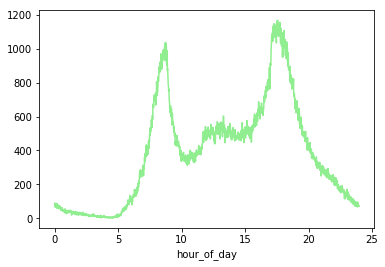

In [5]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot(color = 'lightgreen')
# import seaborn as sns

# sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

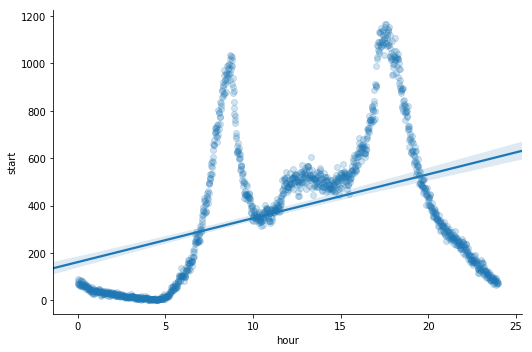

In [6]:
import seaborn as sns

sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend

In [7]:
hours.head(10)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour
hour_of_day,,,,,,,,,,,,
0.00,70,70,70,70,70,70,70,70,70,70,70,0.00
0.02,90,90,90,90,90,90,90,90,90,90,90,0.02
0.03,71,71,71,71,71,71,71,71,71,71,71,0.03
0.05,77,77,77,77,77,77,77,77,77,77,77,0.05
0.07,68,68,68,68,68,68,68,68,68,68,68,0.07
0.08,86,86,86,86,86,86,86,86,86,86,86,0.08
0.10,66,66,66,66,66,66,66,66,66,66,66,0.10
0.12,75,75,75,75,75,75,75,75,75,75,75,0.12
0.13,65,65,65,65,65,65,65,65,65,65,65,0.13



## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

In [8]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

# Model 1 with polynomial degree = 5

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly1 = PolynomialFeatures(degree=5)

x = np.array(hours['hour']).reshape(-1,1)

print(x)

[[0.000e+00]
 [2.000e-02]
 [3.000e-02]
 ...
 [2.395e+01]
 [2.397e+01]
 [2.398e+01]]


In [10]:
y = np.array(hours['Duration (ms)'])

print(y)

[70 90 71 ... 74 75 72]


In [11]:
x1 = poly1.fit_transform(x)

In [12]:
model1 = linear_model.LinearRegression()
model1.fit(x1, y)
(model1.coef_, model1.intercept_)

(array([ 0.00000000e+00, -1.21796625e+02,  4.42668585e+01, -4.41725832e+00,
         1.94287099e-01, -3.29527508e-03]), 93.09799189614682)

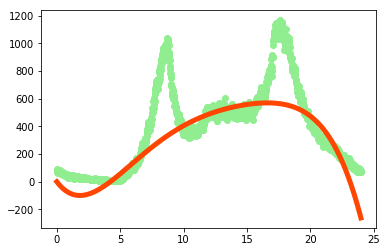

In [13]:
plt.scatter(x,y, color = 'lightgreen')
plt.plot(x , np.dot(x1, model1.coef_), + model1.intercept_, color = 'orangered', linewidth = 5.0 )

We can see that the model 1 with polynomial degree 5 does not fit with `hour_of_day`.

# Model 2 with polynomial degree = 10

In [14]:
poly2 = PolynomialFeatures(degree=10)

In [15]:
x2 = poly2.fit_transform(x)

In [16]:
model2 = linear_model.LinearRegression()
model2.fit(x2, y)
(model2.coef_, model2.intercept_)

(array([ 0.00000000e+00, -4.34565817e+02,  5.70285455e+02, -3.16065337e+02,
         8.69035753e+01, -1.31658093e+01,  1.17457293e+00, -6.32390657e-02,
         2.01667748e-03, -3.49989668e-05,  2.54037957e-07]),
 136.59668224543952)

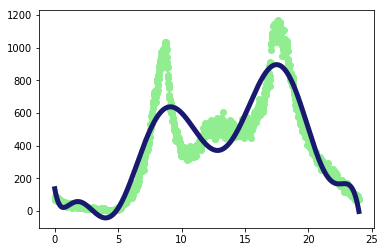

In [17]:
plt.scatter(x,y, color = 'lightgreen')
plt.plot(x, np.dot(x2, model2.coef_) + model2.intercept_, color = 'midnightblue', linewidth = '5.0')

The model 2 with polynomial degree 10 seems to fit with `hour_of_day`.

# Model 3 with polynomial degree = 12

In [18]:
poly3 = PolynomialFeatures(degree=12)

In [19]:
x3 = poly3.fit_transform(x)

In [20]:
model3 = linear_model.LinearRegression()
model3.fit(x3, y)
(model3.coef_, model3.intercept_)

(array([ 0.00000000e+00, -5.95756749e-01, -1.91653508e+00, -4.19889357e+00,
        -4.51709903e+00,  3.12028139e+00, -7.05175124e-01,  8.18932116e-02,
        -5.54554695e-03,  2.27341093e-04, -5.54504987e-06,  7.37751677e-08,
        -4.10145806e-10]), 79.39405964041748)

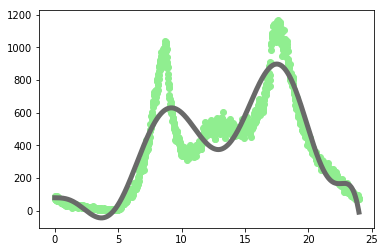

In [22]:
plt.scatter(x,y, color = 'lightgreen')
plt.plot(x, np.dot(x3, model3.coef_) + model3.intercept_, color = 'dimgrey', linewidth = '5.0')

Also, the model 3 with polynomial degree 12 seems to fit with `hour_of_day`.

Hence, there are two models which are model 2 and 3 that fit with `hour_of_day`.

## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


According to the polynomial models above, there are 2 models that fit with `hour_of_day`. However, model 3 seems to be the best fit. Therefore, I chose model 3 to create three models with different alpha values.

# (1) alpha = 0

In [23]:
ridge1 = linear_model.Ridge(alpha = 0)
ridge1.fit(x3, y)
(ridge1.coef_, ridge1.intercept_)

(array([ 0.00000000e+00, -2.22211374e+02,  4.76542924e+02, -3.28018357e+02,
         1.06531061e+02, -1.96258224e+01,  2.29631988e+00, -1.82773381e-01,
         1.02270268e-02, -4.00428544e-04,  1.04506792e-05, -1.62264241e-07,
         1.12438264e-09]), 238.68328296818459)

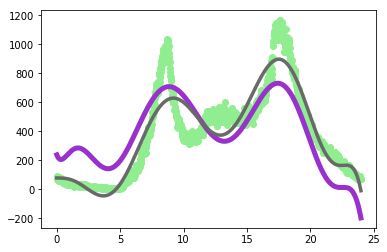

In [24]:
plt.scatter(x,y, color = 'lightgreen')
plt.plot(x, np.dot(x3, ridge1.coef_) + ridge1.intercept_, color ='darkorchid', linewidth = '5')
plt.plot(x, np.dot(x3, model3.coef_) + model3.intercept_, color = 'dimgrey', linewidth = '3.5')

The ridge model with alpha 0 does not fit with model 3.

# (2) alpha = 0.5

In [25]:
ridge2 = linear_model.Ridge(alpha=0.5)
ridge2.fit(x3, y)
(ridge2.coef_, ridge2.intercept_)

C:\Users\Anchee\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.883349e-36
  overwrite_a=True).T


(array([ 0.00000000e+00, -2.05986063e+02,  3.39953381e+02, -2.11836735e+02,
         6.09257752e+01, -9.22159290e+00,  7.89940204e-01, -3.85635425e-02,
         9.73788616e-04, -6.57946359e-06, -2.19946333e-07,  4.34959766e-09,
        -1.69570765e-11]), 77.33763336841025)

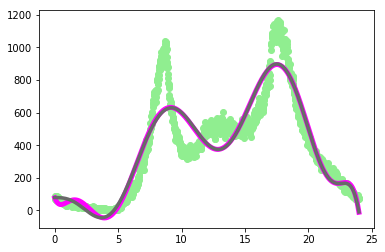

In [26]:
plt.scatter(x,y, color = 'lightgreen')
plt.plot(x, np.dot(x3, ridge2.coef_) + ridge2.intercept_, color ='fuchsia', linewidth = '5')
plt.plot(x, np.dot(x3, model3.coef_) + model3.intercept_, color = 'dimgrey', linewidth = '3.5')

The ridge model with alpha 0.5 seems to fit with model 3.

# (3) alpha = 1

In [27]:
ridge3 = linear_model.Ridge(alpha=1)
ridge3.fit(x3, y)
(ridge3.coef_, ridge3.intercept_)

C:\Users\Anchee\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.474511e-35
  overwrite_a=True).T


(array([ 0.00000000e+00, -1.04699758e+02,  1.95750626e+02, -1.20481057e+02,
         2.90732663e+01, -2.41692556e+00, -1.54784843e-01,  4.92926939e-02,
        -4.54634778e-03,  2.24718648e-04, -6.41182622e-06,  1.00131166e-07,
        -6.68236567e-10]), 59.102245799095044)

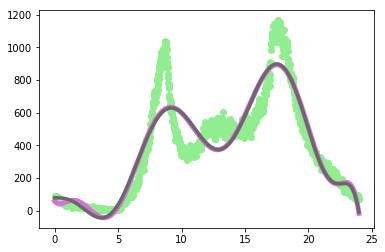

In [28]:
plt.scatter(x,y, color = 'lightgreen')
plt.plot(x, np.dot(x3, ridge3.coef_) + ridge3.intercept_, color ='orchid', linewidth = '5')
plt.plot(x, np.dot(x3, model3.coef_) + model3.intercept_, color = 'dimgrey', linewidth = '3.5')

Also, the ridge model with alpha 1 seems to fit with model 3.